# Análise da Vacinação contra a Covid-19 no Estado da Bahia

Os dados aqui exibidos são de acesso público e são disponibilizados pela própria secretaria atraves do seu site oficial











# Importando a base de dados

In [37]:
# Importando as bibliotecas 

import pandas as pd
import matplotlib.pyplot as plt 

In [38]:
# Realizando a importação da biblioteca para o upload da base de dados

from google.colab import files

arqquivo = files.upload()

Saving Doses Aplicadas_23-09.xlsx to Doses Aplicadas_23-09 (1).xlsx


In [39]:
# Lendo a base de dados e atribuindo a uma variavel

df = pd.read_excel('Doses Aplicadas_23-09.xlsx')

In [40]:
# Exibindo os 5 primeiros registros

df.head()

,Cód. IBGE,Núcleo Regional de Saúde (NRS),Município,Trabalhadores de Saúde - D1,Indígenas Aldeados - D1,Quilombolas - D1,Idosos ILPI - D1,Pessoas com deficiência - D1,Transplantados - D1,Imunossuprimidos - D1,Portadores de Doença renal crônica - D1,Portadores de Pneumopatias crônicas graves - D1,Portadores de doença cerebrovascular - D1,Portadores de Doença Cardiovasculares - D1,Portadores de cirrose hepática - D1,Portadores de Hemoglobinopatias graves - D1,Portadores de Diabetes mellitus - D1,"Portadores de Hipertensão Arterial Resistente, estágio 3 ou 1 e 2 com comorbidade - D1",Portadores de Obesidade mórbida - D1,Gestantes e puérperas - D1,Portadores de Síndrome de Down 18 a 59 anos - D1,Trabalhadores de Transporte Coletivo Rodoviários - D1,Trabalhadores de Transporte Coletivo Metroviários e Ferroviários - D1,Trabalhadores da Educação Ensino Básico 30 anos + - D1,Trabalhadores da Educação Ensino Superior 30 anos + - D1,Trabalhadores de Limpeza Urbana 40 anos + - D1,Forças de segurança e salvamento 30 anos + - D1,Comunidades Ribeirinhas - D1,Pessoas em Situação de rua - D1,Funcionários do sistema prisional - D1,População Privada de Liberdade - D1,Caminhoneiros - D1,Trabalhadores de transporte Aéreo - D1,Trabalhadores Portuários - D1,Trabalhadores industriais - D1,Lactantes (até 12 meses) 18 anos + -D1,Profissionais de Comunicação 40 anos + - D1,Profissionais dos Correios e bancários - D1,Pessoas 18 anos - D1,Pessoas 19 anos - D1,...,Portadores de Doença Cardiovasculares - DU,Portadores de cirrose hepática - DU,Portadores de Hemoglobinopatias graves - DU,Portadores de Diabetes mellitus - DU,"Portadores de Hipertensão Arterial Resistente, estágio 3 ou 1 e 2 com comorbidade - DU",Portadores de Obesidade mórbida - DU,Portadores de Síndrome de Down 18 a 59 anos - DU,Trabalhadores de Transporte Coletivo Rodoviários - DU,Trabalhadores de Transporte Coletivo Metroviários e Ferroviários - DU,Trabalhadores da Educação Ensino Básico 30 anos + - DU,Trabalhadores da Educação Ensino Superior 30 anos + - DU,Trabalhadores de Limpeza Urbana 40 anos + - DU,Forças de segurança e salvamento 30 anos + - DU,Comunidades Ribeirinhas - DU,Pessoas em Situação de rua - DU,Funcionários do sistema prisional - DU,População Privada de Liberdade - DU,Caminhoneiros - DU,Trabalhadores de transporte Aéreo - DU,Trabalhadores Portuários - DU,Trabalhadores industriais - DU,Lactantes (até 12 meses) 18 anos + -DU,Profissionais de Comunicação 40 anos + - DU,Trabalhadores dos Correios e bancários - DU,Pessoas 18 anos - DU,Pessoas 19 anos - DU,Pessoas 20 a 29 anos - DU,Pessoas 30 a 39 anos - DU,Pessoas 40 a 49 anos - DU,Pessoas 50 a 59 anos - DU,Idosos 60 a 69 anos - DU,Idosos 70 a 79 anos - DU,Idosos 80 a 89 anos - DU,Idosos 90 anos + - DU,Total de Doses Aplicadas - DU,Idosos 80 anos + - D3,Profissionais de Saúde 60 anos + - D3,Idosos ILPI 3ª - D3,Portadores de Imunossupressão - D3,Total de Doses Aplicadas - D3
0,290010.0,Centro-Leste,Abaíra,296,0,413,21,111,0,21,6,40,29,27,5,0,142,25,44,23,4,133,0,215,0,51,17,0,0,0,0,0,0,0,13,55,0,0,50,51,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,25,1,0,0,0,0,0,40,0,0,0,0,0
1,290020.0,Norte,Abaré,379,1119,184,0,174,0,40,9,24,6,23,0,1,251,145,85,172,7,6,0,289,0,37,19,0,0,0,0,24,0,0,1,224,4,2,260,214,...,0,0,0,0.0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,107,98,4,3,0,0,0,224,0,0,0,0,0
2,290030.0,Nordeste,Acajutiba,246,0,0,32,18,0,9,3,3,4,10,2,3,226,145,32,78,10,2,0,313,0,62,4,0,0,0,0,21,0,0,0,40,1,3,214,245,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,136,0,0,0,0,0,170,1,0,25,0,26
3,290035.0,Nordeste,Adustina,406,0,0,0,164,2,34,7,40,0,26,1,0,208,101,66,121,5,3,0,373,0,90,25,0,0,0,1,46,0,0,0,103,0,24,243,239,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162,32,3,0,1,0,0,200,99,0,0,4,103
4,290040.0,Centro-Leste,Água Fria,339,0,217,0,137,3,5,9,13,36,15,0,19,148,322,17,90,2,32,0,170,0,21,9,0,0,0,0,0,0,0,0,83,2,0,206,164,...,0,0,0,0.0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1,3,0,0,0,0,0,89

In [41]:
# Exibindo os 5 ultimos registros

df.tail()

,Cód. IBGE,Núcleo Regional de Saúde (NRS),Município,Trabalhadores de Saúde - D1,Indígenas Aldeados - D1,Quilombolas - D1,Idosos ILPI - D1,Pessoas com deficiência - D1,Transplantados - D1,Imunossuprimidos - D1,Portadores de Doença renal crônica - D1,Portadores de Pneumopatias crônicas graves - D1,Portadores de doença cerebrovascular - D1,Portadores de Doença Cardiovasculares - D1,Portadores de cirrose hepática - D1,Portadores de Hemoglobinopatias graves - D1,Portadores de Diabetes mellitus - D1,"Portadores de Hipertensão Arterial Resistente, estágio 3 ou 1 e 2 com comorbidade - D1",Portadores de Obesidade mórbida - D1,Gestantes e puérperas - D1,Portadores de Síndrome de Down 18 a 59 anos - D1,Trabalhadores de Transporte Coletivo Rodoviários - D1,Trabalhadores de Transporte Coletivo Metroviários e Ferroviários - D1,Trabalhadores da Educação Ensino Básico 30 anos + - D1,Trabalhadores da Educação Ensino Superior 30 anos + - D1,Trabalhadores de Limpeza Urbana 40 anos + - D1,Forças de segurança e salvamento 30 anos + - D1,Comunidades Ribeirinhas - D1,Pessoas em Situação de rua - D1,Funcionários do sistema prisional - D1,População Privada de Liberdade - D1,Caminhoneiros - D1,Trabalhadores de transporte Aéreo - D1,Trabalhadores Portuários - D1,Trabalhadores industriais - D1,Lactantes (até 12 meses) 18 anos + -D1,Profissionais de Comunicação 40 anos + - D1,Profissionais dos Correios e bancários - D1,Pessoas 18 anos - D1,Pessoas 19 anos - D1,...,Portadores de Doença Cardiovasculares - DU,Portadores de cirrose hepática - DU,Portadores de Hemoglobinopatias graves - DU,Portadores de Diabetes mellitus - DU,"Portadores de Hipertensão Arterial Resistente, estágio 3 ou 1 e 2 com comorbidade - DU",Portadores de Obesidade mórbida - DU,Portadores de Síndrome de Down 18 a 59 anos - DU,Trabalhadores de Transporte Coletivo Rodoviários - DU,Trabalhadores de Transporte Coletivo Metroviários e Ferroviários - DU,Trabalhadores da Educação Ensino Básico 30 anos + - DU,Trabalhadores da Educação Ensino Superior 30 anos + - DU,Trabalhadores de Limpeza Urbana 40 anos + - DU,Forças de segurança e salvamento 30 anos + - DU,Comunidades Ribeirinhas - DU,Pessoas em Situação de rua - DU,Funcionários do sistema prisional - DU,População Privada de Liberdade - DU,Caminhoneiros - DU,Trabalhadores de transporte Aéreo - DU,Trabalhadores Portuários - DU,Trabalhadores industriais - DU,Lactantes (até 12 meses) 18 anos + -DU,Profissionais de Comunicação 40 anos + - DU,Trabalhadores dos Correios e bancários - DU,Pessoas 18 anos - DU,Pessoas 19 anos - DU,Pessoas 20 a 29 anos - DU,Pessoas 30 a 39 anos - DU,Pessoas 40 a 49 anos - DU,Pessoas 50 a 59 anos - DU,Idosos 60 a 69 anos - DU,Idosos 70 a 79 anos - DU,Idosos 80 a 89 anos - DU,Idosos 90 anos + - DU,Total de Doses Aplicadas - DU,Idosos 80 anos + - D3,Profissionais de Saúde 60 anos + - D3,Idosos ILPI 3ª - D3,Portadores de Imunossupressão - D3,Total de Doses Aplicadas - D3
413,293340.0,Centro-Leste,Wagner,199,0,38,0,100,5,31,12,50,25,48,2,0,120,570,7,84,5,10,0,239,0,75,7,0,0,0,0,39,0,0,0,18,0,11,103,99,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,29,71,4,2,0,0,0,110,0,0,0,0,0
414,293345.0,Oeste,Wanderley,498,0,0,0,52,1,2,27,202,0,109,6,8,28,148,237,82,7,4,0,153,0,47,35,360,0,0,0,0,0,0,0,0,10,6,15,16,...,0,0,0,0.0,1,0,0,0,0,122,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10,4,9,4,0,1,0,0,156,0,0,0,0,0
415,293350.0,Sul,Wenceslau Guimarães,295,0,1241,16,27,1,74,5,12,64,40,0,3,258,77,30,203,14,0,0,319,0,0,37,0,0,0,0,18,0,0,0,134,0,0,266,336,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,27,114,52,23,2,1,0,0,222,0,0,0,1,1
416,293360.0,Centro-norte,Xique-Xique,846,0,668,0,178,6,55,37,374,54,33,11,26,618,307,94,317,27,49,0,1383,63,25,120,0,0,2,23,6,0,0,95,308,0,38,656,503,...,0,0,0,0.0,0,0,0,0,0,14,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,230,179,80,4,2,0,0,515,0,0,0,0,0
417,NaN,Regionais de Saúde,Regionais de Saúde,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,

In [46]:
# Exibindo todas as colunas 

df.columns.to_list()

['Cód. IBGE',
 'Núcleo Regional de Saúde (NRS)',
 'Município',
 'Trabalhadores de Saúde - D1',
 'Indígenas Aldeados - D1',
 'Quilombolas - D1',
 'Idosos ILPI - D1',
 'Pessoas com deficiência - D1',
 'Transplantados - D1',
 'Imunossuprimidos - D1',
 'Portadores de Doença renal crônica - D1',
 'Portadores de Pneumopatias crônicas graves - D1',
 'Portadores de doença cerebrovascular - D1',
 'Portadores de Doença Cardiovasculares - D1',
 'Portadores de cirrose hepática - D1',
 'Portadores de Hemoglobinopatias graves - D1',
 'Portadores de Diabetes mellitus - D1',
 'Portadores de Hipertensão Arterial Resistente, estágio 3 ou 1 e 2 com comorbidade - D1',
 'Portadores de Obesidade mórbida - D1',
 'Gestantes e puérperas - D1',
 'Portadores de Síndrome de Down 18 a 59 anos - D1',
 'Trabalhadores de Transporte Coletivo Rodoviários  - D1',
 'Trabalhadores de Transporte Coletivo Metroviários e Ferroviários - D1',
 'Trabalhadores da Educação  Ensino Básico 30 anos + - D1',
 'Trabalhadores da Educaç

In [47]:
# Exibindo o total de linhas e colunas

df.shape

(418, 149)

# Tratando a base de dados

In [48]:
# Selecionado algumas colunas e atribuindo a uma variavel

colunas_selecionadas = df[
  ['Cód. IBGE',
   'Núcleo Regional de Saúde (NRS)',
   'Município',
   'Total de Doses Aplicadas - D1', 
   'Total de Doses Aplicadas - D2', 
   'Total de Doses Aplicadas - D3', 
   'Total de Doses Aplicadas - DU']]

In [49]:
# Retirando o registro que contem o 'Núcleo Regional de Saúde (NRS)' igual a Regionais de Saúde 

df_base = colunas_selecionadas.loc[colunas_selecionadas['Núcleo Regional de Saúde (NRS)'] != 'Regionais de Saúde']

In [50]:
# Exibindo o total de linhas e colunas

df_base.shape 

(417, 7)

In [51]:
# Renomeando as colunas

df_base = df_base.rename(columns = 
    {'Cód. IBGE':'Cod. IBGE',
     'Núcleo Regional de Saúde (NRS)':'Nucleo Regional de Saude (NRS)',
     'Município':'Municipio',
     'Total de Doses Aplicadas - D1':'1ª Dose - Doses Aplicadas',
     'Total de Doses Aplicadas - D2':'2ª Dose - Doses Aplicadas',
     'Total de Doses Aplicadas - D3':'Dose Reforco - Doses Aplicadas',
     'Total de Doses Aplicadas - DU':'Dose Unica - Doses Aplicadas'},
    inplace=False)

# Visualizando os dados e gerando informações

In [66]:
plt.style.use('ggplot') # Altera o estilo do grafico

In [64]:
# Exibindo o total de doses aplicadas por dose (Tablea)

df_totalVacinados = df_base[['1ª Dose - Doses Aplicadas',
                             '2ª Dose - Doses Aplicadas',
                             'Dose Reforco - Doses Aplicadas',
                             'Dose Unica - Doses Aplicadas']].sum().reset_index()

df_totalVacinados = df_totalVacinados.rename(columns={'index':'Dose', 0:'Total de Doses Aplicadas'})

df_totalVacinados

,Dose,Total de Doses Aplicadas
0,1ª Dose - Doses Aplicadas,9440830
1,2ª Dose - Doses Aplicadas,4781148
2,Dose Reforco - Doses Aplicadas,27672
3,Dose Unica - Doses Aplicadas,257689


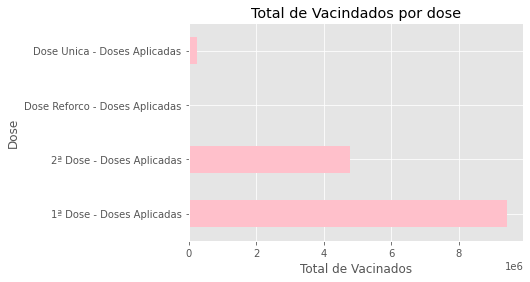

In [78]:
# Exibindo o total de doses aplicadas por dose (Grafico)

df_totalVacinados = df_base[['1ª Dose - Doses Aplicadas',
                             '2ª Dose - Doses Aplicadas',
                             'Dose Reforco - Doses Aplicadas',
                             'Dose Unica - Doses Aplicadas']].sum().plot.barh(
                                                                  title='Total de Vacindados por dose',
                                                                  color='pink')

plt.xlabel('Total de Vacinados')
plt.ylabel('Dose');

In [73]:
# Exibindo o total de doses aplicadas por dose e por nucleo regional de saude (Tabela)

df_base.groupby(['Nucleo Regional de Saude (NRS)'])[['1ª Dose - Doses Aplicadas', 
                                                     '2ª Dose - Doses Aplicadas',
                                                     'Dose Reforco - Doses Aplicadas', 
                                                     'Dose Unica - Doses Aplicadas']].sum()

,1ª Dose - Doses Aplicadas,2ª Dose - Doses Aplicadas,Dose Reforco - Doses Aplicadas,Dose Unica - Doses Aplicadas
Nucleo Regional de Saude (NRS),,,,
Centro-Leste,1389581,694748,1465,26630
Centro-norte,518659,289921,1425,8134
Extremo Sul,481860,217145,47,9463
Leste,3068863,1580548,18639,142080
Nordeste,520235,251809,1286,9908
Norte,665928,331949,361,11212
Oeste,618780,295360,1087,10734
Sudoeste,1197752,606366,2526,20699
Sul,979172,513302,836,18829


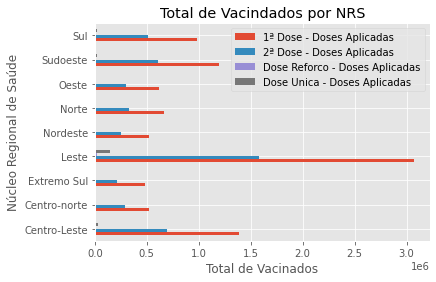

In [75]:
# Exibindo o total de doses aplicadas por dose e por nucleo regional de saude (Grafico)

df_base.groupby(['Nucleo Regional de Saude (NRS)'])[['1ª Dose - Doses Aplicadas', 
                                                     '2ª Dose - Doses Aplicadas',
                                                     'Dose Reforco - Doses Aplicadas', 
                                                     'Dose Unica - Doses Aplicadas']].sum().plot.barh(
                                                                                        title='Total de Vacindados por NRS')

plt.xlabel('Total de Vacinados')
plt.ylabel('Núcleo Regional de Saúde');

In [94]:
# Exibindo o total de doses aplicadas por dose e por municipio (Tabela)

dosesAplicadasMunicipio = df_base.loc[df_base['Municipio'] == 'Riachão do Jacuípe']            

In [95]:
dosesAplicadasMunicipio 

,Cod. IBGE,Nucleo Regional de Saude (NRS),Municipio,1ª Dose - Doses Aplicadas,2ª Dose - Doses Aplicadas,Dose Reforco - Doses Aplicadas,Dose Unica - Doses Aplicadas
323,292630.0,Centro-Leste,Riachão do Jacuípe,20690,8956,0,404


In [121]:
# Exibindo a quantidade de municpios por nucleo regional de saude (Tabela)

df_MNRS = df_base['Nucleo Regional de Saude (NRS)'].value_counts().reset_index()


municipiosPorNRS = df_MNRS.rename(columns={'index':'Nucleo Regional de Saude (NRS)',
                                           'Nucleo Regional de Saude (NRS)':'Qtde Municipios'})

municipiosPorNRS

,Nucleo Regional de Saude (NRS),Qtde Municipios
0,Sudoeste,73
1,Centro-Leste,72
2,Sul,68
3,Leste,47
4,Centro-norte,38
5,Oeste,37
6,Nordeste,33
7,Norte,28
8,Extremo Sul,21


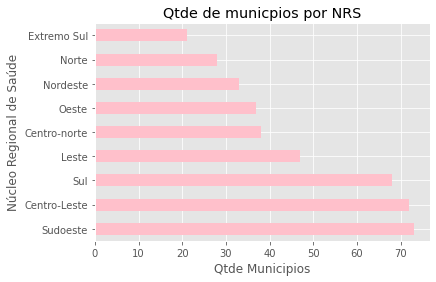

In [125]:
# Exibindo a quantidade de municpios por nucleo regional de saude (Grafico)

df_MNRS = df_base['Nucleo Regional de Saude (NRS)'].value_counts().plot.barh(
                                                                    title='Qtde de municpios por NRS',
                                                                    color='pink')

plt.xlabel('Qtde Municipios')
plt.ylabel('Núcleo Regional de Saúde');

In [128]:
print('The End, isso é tudo pessoal... Por enquanto')

The End, isso é tudo pessoal... Por enquanto
